# 5. Model

In [66]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [67]:
df = pd.read_csv('csv/clean_data.csv')
df.head()

,BOROUGH,ADDRESS,ZIP CODE,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Latitude,Longitude,Clean Address,Match,Year,Month,Day,Weekday
0,2,1667 WASHINGTON AVENUE,10457.0,3167.0,1899.0,980000.0,2022-09-10,40.841270,-73.901313,1667 WASHINGTON AVENUE,0,2022,9,10,5
1,2,410 EAST 179TH STREET,10457.0,2048.0,1901.0,655000.0,2022-11-03,40.850353,-73.898824,410 EAST 179TH STREET,0,2022,11,3,3
2,2,4455 PARK AVENUE,10457.0,1587.0,1899.0,520000.0,2022-10-28,40.853630,-73.895963,4455 PARK AVENUE,0,2022,10,28,4
3,2,443 EAST 180 STREET,10457.0,2820.0,1952.0,720000.0,2022-02-25,40.851764,-73.896429,443 EAST 180 STREET,0,2022,2,25,4
4,2,2327 WASHINGTON AVE,10458.0,1260.0,1910.0,499999.0,2022-04-30,40.855949,-73.892532,2327 WASHINGTON AVE,0,2022,4,30,5


In [68]:
df = df[['BOROUGH', 'ZIP CODE', 'Latitude', 'Longitude', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE', 'SALE DATE', 'Year', 'Month', 'Day', 'Weekday', 'Match']] 

In [69]:
df.head()

,BOROUGH,ZIP CODE,Latitude,Longitude,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,Year,Month,Day,Weekday,Match
0,2,10457.0,40.841270,-73.901313,3167.0,1899.0,980000.0,2022-09-10,2022,9,10,5,0
1,2,10457.0,40.850353,-73.898824,2048.0,1901.0,655000.0,2022-11-03,2022,11,3,3,0
2,2,10457.0,40.853630,-73.895963,1587.0,1899.0,520000.0,2022-10-28,2022,10,28,4,0
3,2,10457.0,40.851764,-73.896429,2820.0,1952.0,720000.0,2022-02-25,2022,2,25,4,0
4,2,10458.0,40.855949,-73.892532,1260.0,1910.0,499999.0,2022-04-30,2022,4,30,5,0


In [70]:
train_raw = df[df['SALE DATE'] < '2022-10-15'].reset_index(drop=True)
test_raw = df[df['SALE DATE'] >= '2022-10-15'].reset_index(drop=True)

In [71]:
train_raw = train_raw.drop(columns=['SALE DATE'])
test_raw = test_raw.drop(columns=['SALE DATE'])

In [72]:
len(train_raw)

75268

In [73]:
len(test_raw)

16928

## 5.1 Logistic Regression

In [74]:
df['Match'].value_counts()

0    71313
1    20868
2       15
Name: Match, dtype: int64

In [75]:
baseline = (20868+15)/(71313+20868+15)
baseline

0.22650657295327345

### 5.1.1 Prediction with default settings

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [77]:
features = list(train_raw.columns)
target = 'Match'
features.remove(target)

In [78]:
X_train = train_raw[features]
y_train = train_raw[target]

X_test = test_raw[features]
y_test = test_raw[target]

In [79]:
steps = [('Rescale', StandardScaler()),
         ('logr', LogisticRegression())]
model = Pipeline(steps)

model.fit(X_train, y_train)

/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('Rescale', StandardScaler()), ('logr', LogisticRegression())])

In [80]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [81]:
from sklearn.metrics import classification_report

print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     58185
           1       0.58      0.02      0.04     17070
           2       0.00      0.00      0.00        13

    accuracy                           0.77     75268
   macro avg       0.45      0.34      0.30     75268
weighted avg       0.73      0.77      0.68     75268



/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87     13128
           1       0.57      0.02      0.04      3798
           2       0.00      0.00      0.00         2

    accuracy                           0.78     16928
   macro avg       0.45      0.34      0.31     16928
weighted avg       0.73      0.78      0.69     16928



/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

array([[57926,   259,     0],
       [16718,   352,     0],
       [   13,     0,     0]])

In [84]:
confusion_matrix(y_test, y_test_pred)

array([[13066,    62,     0],
       [ 3716,    82,     0],
       [    2,     0,     0]])

In [ ]:
                     Predicted Class 0    Predicted Class 1    Predicted Class 2
Actual Class 0      True Negative (TN)   False Positive (FP)  False Positive (FP)
Actual Class 1      False Negative (FN)  True Positive (TP)   False Positive (FP)
Actual Class 2      False Negative (FN)  False Negative (FN)  True Positive (TP)

### 5.1.2 Prediction with balanced class weights

In [85]:
steps = [('Rescale', StandardScaler()),
         ('logr', LogisticRegression(class_weight = 'balanced'))]
model = Pipeline(steps)

model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('logr', LogisticRegression(class_weight='balanced'))])

In [86]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [87]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.32      0.47     58185
           1       0.35      0.68      0.47     17070
           2       0.00      0.69      0.00        13

    accuracy                           0.41     75268
   macro avg       0.41      0.57      0.31     75268
weighted avg       0.75      0.41      0.47     75268



In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.30      0.44     13128
           1       0.36      0.65      0.47      3798
           2       0.00      1.00      0.00         2

    accuracy                           0.38     16928
   macro avg       0.41      0.65      0.30     16928
weighted avg       0.74      0.38      0.44     16928



In [89]:
confusion_matrix(y_train, y_train_pred)

array([[18899, 21516, 17770],
       [ 2841, 11690,  2539],
       [    4,     0,     9]])

In [90]:
confusion_matrix(y_test, y_test_pred)

array([[3874, 4357, 4897],
       [ 670, 2476,  652],
       [   0,    0,    2]])

### 5.1.3 Probability

In [91]:
y_train_proba = model.predict_proba(X_train)
y_test_proba = model.predict_proba(X_test)

In [92]:
import numpy as np
print('The range of y_train_proba is: (', np.min(y_train_proba[:,1]), ',', np.max(y_train_proba[:,1]), ')')

The range of y_train_proba is: ( 0.0001203436450907808 , 0.9999999999987295 )


In [93]:
print('The range of y_train_proba is: (', np.min(y_test_proba[:,1]), ',', np.max(y_test_proba[:,1]), ')')

The range of y_train_proba is: ( 0.0011045057658203845 , 0.9999999837885767 )


In [94]:
import matplotlib.pylab as plt
%matplotlib inline

/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/s

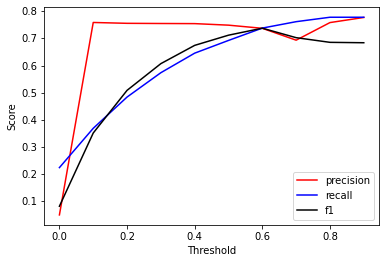

In [113]:
# Plot metrics scores v.s. threshold
from sklearn.metrics import precision_score, recall_score, f1_score

# thresholds = np.linspace(0, 1, 10)
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
precisions = []
recalls = []
f1s = []
ave = "weighted"

for threshold in thresholds:
    y_test_predic = (y_test_proba[:, 1] > threshold).astype(int)
    precisions.append(precision_score(y_test, y_test_predic, average=ave))
    recalls.append(recall_score(y_test, y_test_predic, average=ave))
    f1s.append(f1_score(y_test, y_test_predic, average=ave))

plt.plot(thresholds, precisions, color="red", label="precision")
plt.plot(thresholds, recalls, color="blue", label="recall")
plt.plot(thresholds, f1s, color="black", label="f1")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend(loc="best")
plt.show()

### 5.1.4 ROC AUC

In [116]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score

# Create an instance of the classifier
classifier = LogisticRegression()

# Create an instance of the OneVsRestClassifier
classifier_ovr = OneVsRestClassifier(classifier)

# Train the classifier using the OneVsRest strategy
classifier_ovr.fit(X_train, y_train)

# Get predicted probabilities for each class
y_train_proba_ovr = classifier_ovr.predict_proba(X_train)

# Calculate the ROC AUC score using the 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_train, y_train_proba_ovr, multi_class='ovr')

print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

ROC AUC Score (One-vs-Rest): 0.6575809824746306


In [117]:
# Get predicted probabilities for each class
y_test_proba_ovr = classifier_ovr.predict_proba(X_test)

# Calculate the ROC AUC score using the 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_test, y_test_proba_ovr, multi_class='ovr')

print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

ROC AUC Score (One-vs-Rest): 0.6270878146265013


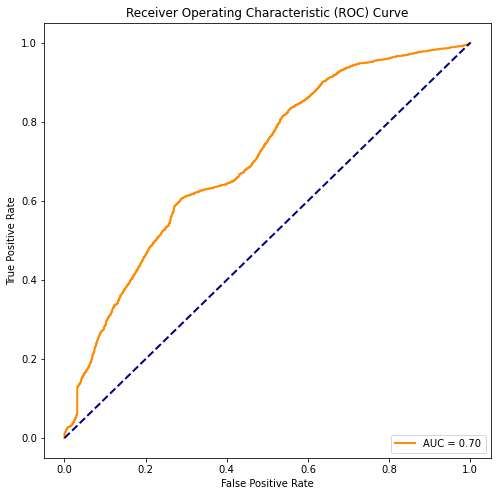

In [120]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba_ovr[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 5.2 Random Forest

### 5.2.1 Original run

In [129]:
from sklearn.ensemble import RandomForestClassifier

In [130]:
steps = [('Rescale', StandardScaler()),
         ('tree', RandomForestClassifier(random_state=42))]
rf_model = Pipeline(steps)

rf_model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('tree', RandomForestClassifier(random_state=42))])

In [131]:
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [132]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     58185
           1       1.00      1.00      1.00     17070
           2       1.00      1.00      1.00        13

    accuracy                           1.00     75268
   macro avg       1.00      1.00      1.00     75268
weighted avg       1.00      1.00      1.00     75268



In [133]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93     13128
           1       0.82      0.63      0.71      3798
           2       0.00      0.00      0.00         2

    accuracy                           0.89     16928
   macro avg       0.57      0.53      0.55     16928
weighted avg       0.88      0.89      0.88     16928



/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
confusion_matrix(y_train, y_train_pred)

array([[58176,     9,     0],
       [   20, 17050,     0],
       [    0,     0,    13]])

In [135]:
confusion_matrix(y_test, y_test_pred)

array([[12601,   527,     0],
       [ 1395,  2403,     0],
       [    2,     0,     0]])

### 5.2.2 ROC AUC

In [136]:
# Create an instance of the classifier
classifier = RandomForestClassifier(random_state=42)

# Create an instance of the OneVsRestClassifier
classifier_ovr = OneVsRestClassifier(classifier)

# Train the classifier using the OneVsRest strategy
classifier_ovr.fit(X_train, y_train)

# Get predicted probabilities for each class
y_train_proba_ovr = classifier_ovr.predict_proba(X_train)

# Calculate the ROC AUC score using the 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_train, y_train_proba_ovr, multi_class='ovr')

print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

ROC AUC Score (One-vs-Rest): 0.999992928165207


In [137]:
# Get predicted probabilities for each class
y_test_proba_ovr = classifier_ovr.predict_proba(X_test)

# Calculate the ROC AUC score using the 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_test, y_test_proba_ovr, multi_class='ovr')

print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

ROC AUC Score (One-vs-Rest): 0.8533975410074031


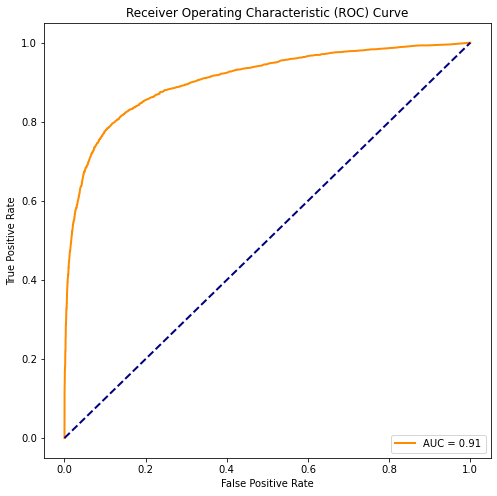

In [138]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba_ovr[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 5.2.3 Feature importance

In [158]:
importances = rf_model.steps[1][1].feature_importances_
importances

array([0.23414925, 0.07520523, 0.11457807, 0.0957855 , 0.29082614,
       0.08476289, 0.03908921, 0.        , 0.02267437, 0.02139035,
       0.02153897], dtype=float32)

([<matplotlib.axis.XTick at 0x7fdac9c07670>,
 [Text(0, 0, 'BOROUGH'),
  Text(1, 0, 'ZIP CODE'),
  Text(2, 0, 'Latitude'),
  Text(3, 0, 'Longitude'),
  Text(4, 0, 'GROSS SQUARE FEET'),
  Text(5, 0, 'YEAR BUILT'),
  Text(6, 0, 'SALE PRICE'),
  Text(7, 0, 'Year'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Day'),
  Text(10, 0, 'Weekday')])

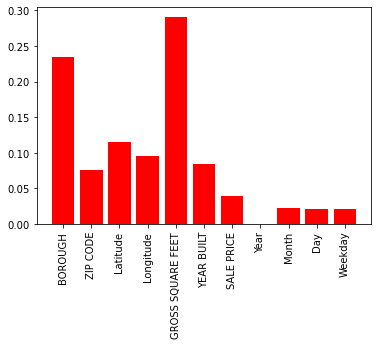

In [159]:
feature_names = X_train.columns
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), feature_names, rotation='vertical')

* Latitude, longitude, gross square feet, year built and sale price play important roles among the features.

### 5.2.4 Tune hyperparameters

## 5.3 XGBoost

### 5.3.1 Oringal run

In [143]:
from xgboost import XGBClassifier

In [145]:
steps = [('Rescale', StandardScaler()),
         ('xgb', XGBClassifier(objective='multi:softmax', num_class=3))]
xgb_model = Pipeline(steps)

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('Rescale', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None, num_class=3,
                               num_parallel_tree=None, ...))])

In [146]:
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

In [147]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94     58185
           1       0.89      0.70      0.78     17070
           2       1.00      1.00      1.00        13

    accuracy                           0.91     75268
   macro avg       0.93      0.89      0.91     75268
weighted avg       0.91      0.91      0.91     75268



In [148]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92     13128
           1       0.78      0.63      0.69      3798
           2       0.00      0.00      0.00         2

    accuracy                           0.88     16928
   macro avg       0.56      0.53      0.54     16928
weighted avg       0.87      0.88      0.87     16928



/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lindawang/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [149]:
confusion_matrix(y_train, y_train_pred)

array([[56648,  1537,     0],
       [ 5086, 11984,     0],
       [    0,     0,    13]])

In [150]:
confusion_matrix(y_test, y_test_pred)

array([[12458,   670,     0],
       [ 1420,  2378,     0],
       [    2,     0,     0]])

### 5.3.2 ROC AUC

In [152]:
# Create an instance of the classifier
classifier = XGBClassifier(objective='multi:softmax', num_class=3)

# Create an instance of the OneVsRestClassifier
classifier_ovr = OneVsRestClassifier(classifier)

# Train the classifier using the OneVsRest strategy
classifier_ovr.fit(X_train, y_train)

# Get predicted probabilities for each class
y_train_proba_ovr = classifier_ovr.predict_proba(X_train)

# Calculate the ROC AUC score using the 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_train, y_train_proba_ovr, multi_class='ovr')

print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

ROC AUC Score (One-vs-Rest): 0.9682316808818436


In [153]:
# Get predicted probabilities for each class
y_test_proba_ovr = classifier_ovr.predict_proba(X_test)

# Calculate the ROC AUC score using the 'ovr' strategy
roc_auc_ovr = roc_auc_score(y_test, y_test_proba_ovr, multi_class='ovr')

print(f"ROC AUC Score (One-vs-Rest): {roc_auc_ovr}")

ROC AUC Score (One-vs-Rest): 0.8697960279867071


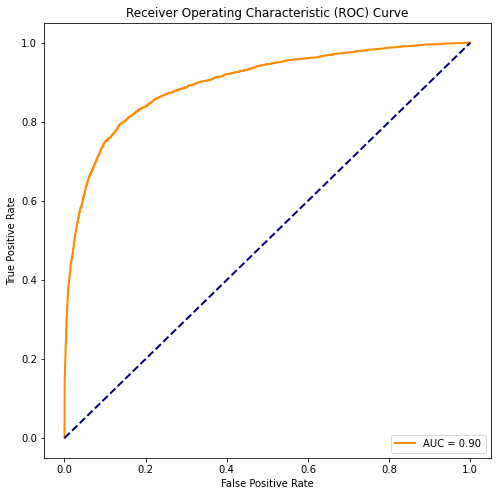

In [154]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba_ovr[:, 1], pos_label=1)

# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### 5.2.3 Feature importance

In [155]:
importances = xgb_model.steps[1][1].feature_importances_
importances

array([0.23414925, 0.07520523, 0.11457807, 0.0957855 , 0.29082614,
       0.08476289, 0.03908921, 0.        , 0.02267437, 0.02139035,
       0.02153897], dtype=float32)

([<matplotlib.axis.XTick at 0x7fdac9c1e9a0>,
 [Text(0, 0, 'BOROUGH'),
  Text(1, 0, 'ZIP CODE'),
  Text(2, 0, 'Latitude'),
  Text(3, 0, 'Longitude'),
  Text(4, 0, 'GROSS SQUARE FEET'),
  Text(5, 0, 'YEAR BUILT'),
  Text(6, 0, 'SALE PRICE'),
  Text(7, 0, 'Year'),
  Text(8, 0, 'Month'),
  Text(9, 0, 'Day'),
  Text(10, 0, 'Weekday')])

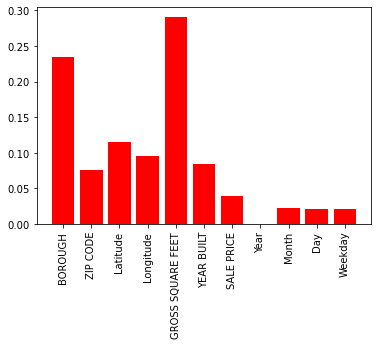

In [157]:
feature_names = X_train.columns
plt.bar(range(len(importances)), importances, color="r", align = "center")
plt.xticks(range(len(importances)), feature_names, rotation='vertical')

* Borough and gross square feet play important roles in the features.

### 5.3.4 Tune hyperparameters